# Part II - Factors Affecting  Price of Fairly Used Vehicle in                         Nigeria 

## IBRAHIM ALI


## Investigation Overview


> In this investigation, I wanted to look at the characteristics of vehicle that could be used to predict their prices. The main focus was on the four category features, vehicle engine cylinder, transmission type, fuel type and locally used or foriegn used vehicles

> 


## Dataset Overview

> The data consisted of prices and attributes of approximately 1,451 observation. The attributes included the vehicle engine cylinder, transmission type, fuel type and locally used or foriegn used vehicles, year, location, car model, and odometer. 

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
def wrangle(file):
    
    # load my dataset
    df = pd.read_csv(file)
    
    # I have figure out some erro during data recording on some states in location column 
    # and there is some odd values that does not belong to Nigeria states, i.e Accra and Mushin
    
    # let replace the mis spelling state name 
    df['location'] = df['location'].replace({'Lagos ':'Lagos',
                                                  'Lagos State':'Lagos',
                                                    'Abuja ':'Abuja',
                                                     'FCT':'Abuja',
                                                     'Arepo ogun state ':'Ogun',
                                                     'Ogun State':'Ogun',
                                                     'Accra':'other',
                                                     'Mushin':'other',
                                                    'Abia State':'Abia'})
    
    
    # let change the year datype to datetime format
    #df['year'] = pd.to_datetime(df['year'])
    
    
    # convert engine, isimported, fuel and transmission into ordered categorical types
    ordinal_var_dict = {'engine': ['8-cylinder(V8)','6-cylinder(V6)','6-cylinder(I6)','5-cylinder(I5)','4-cylinder(H4)','4-cylinder(I4)','3-cylinder(I3)','2-cylinder(I2)'],
                    'isimported': ['Locally used', 'Foreign Used', 'New'],
                    'transmission': ['manual', 'automatic'],
                       'fuel':['petrol', 'diesel']}

    for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
   
    
    return df
    

In [17]:
# load my dataset
car_data = wrangle('car_scrape.csv')
car_data.head()

,title,odometer,location,isimported,engine,transmission,fuel,paint,price,year
0,Toyota Corolla,60127,Lagos,Locally used,4-cylinder(I4),automatic,petrol,Silver,1995000,2009
1,Acura MDX,132908,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Whine,3315000,2009
2,Lexus ES 350,120412,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Silver,2655000,2008
3,Mercedes-Benz GLK 350,67640,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,9015000,2013
4,Mercedes-Benz E 200,92440,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,Black,5790000,2013


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Vehicles Prices
The vehicles price has a long tailed distribution, most of the data are clustering around 400000 to 25000000 but there is an outlier on the data, when i remove the outlier distribution look roughly  multimodal shape

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in the next cell, as a sub-slide type. Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

In [18]:
# select outliers, and remove them using criteria eyeballed from the plots
car_data = car_data[car_data['price'] <= 12005000]
car_data = car_data[car_data['odometer'] < 900000]

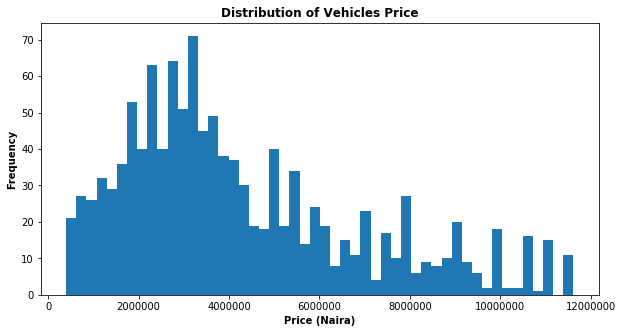

In [19]:
#let re-check the vehicles price distribuution after remove my outlier
plt.figure(figsize=(10,5))
plt.hist(car_data['price'],bins=50);
plt.xlabel('Price (Naira)',weight='bold')
plt.title('Distribution of Vehicles Price',weight='bold')
plt.ticklabel_format(style='plain', axis='x',weight='bold')
plt.ylabel('Frequency',weight='bold');

## Distribution of Vehicles Odometer

> The distribution of vehicles odometer has a long tailed distribution, most of the data are clustering around 0 to 300000km but there is an outlier on the data, when i remove the outlier distribution look roughly Bimodal shape!

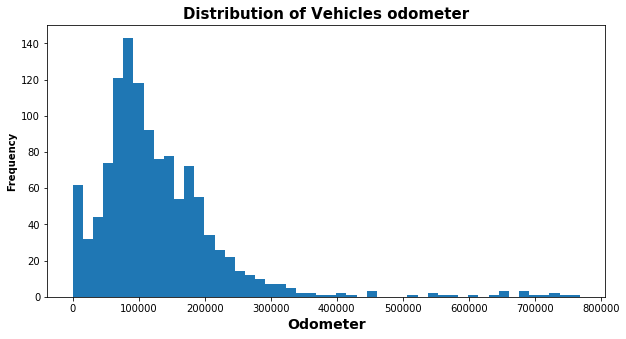

In [20]:
# let re-check the vehicles odometer distribuution 
plt.figure(figsize=(10,5))
plt.hist(car_data['odometer'],bins=50);
plt.xlabel('Odometer',fontsize=14,weight='bold')
plt.title('Distribution of Vehicles odometer',fontsize=15,weight='bold')
plt.ylabel('Frequency',weight='bold');

## Vehicles Price vs. Odometer Reading

I plot a scatter plot between vehicle selling price and odometer reading, Based on this graph it show a negative correlation between price and odometer, which show that vehicle with high odometer reading tend to have lower selling  price while the one with lower odometer reading expected to be more expensive

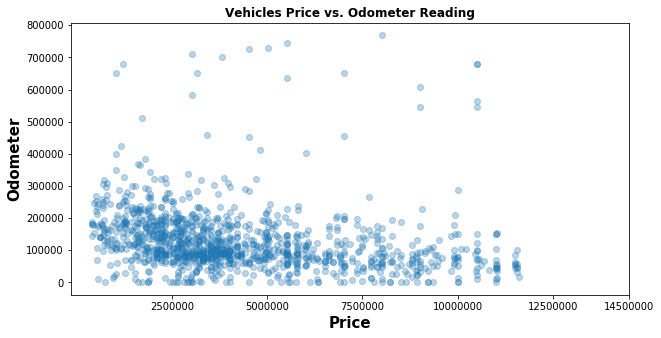

In [21]:
plt.figure(figsize=(10,5))
ticks = [2500000,5000000,7500000,10000000,12500000,14500000]
labels = ['{}'.format(i) for i in ticks]
plt.scatter(data=car_data, x = 'price', y ='odometer', alpha=3/10)
plt.xlabel('Price',fontsize=15,weight='bold')
plt.ylabel('Odometer',fontsize=15,weight='bold')
plt.xticks(ticks, labels)
plt.title('Vehicles Price vs. Odometer Reading',weight='bold');

## Vehicles Price vs. Engine Cylinder Type

As i expected there is positive relationship between vehicle price and engine cylinder type, most of the vehicle that used higher number of engine cylinder used diesel as fuel which i expected to be more expensive than the one that used petrol as a fuel. But i will confirm this in the next slide

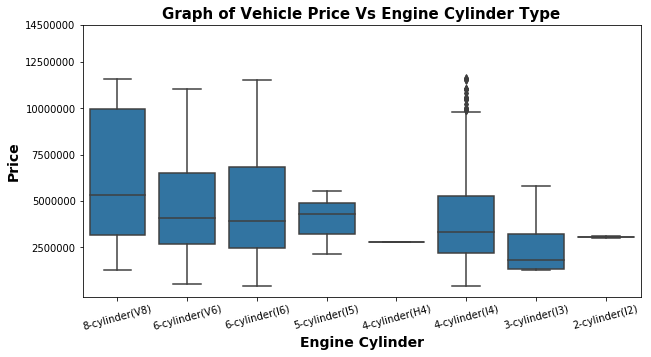

In [22]:
# plot of numeric features against categorical features.
plt.figure(figsize = [10, 5])
ticks = [2500000,5000000,7500000,10000000,12500000,14500000]
labels = ['{}'.format(i) for i in ticks]
base_color = sb.color_palette()[0]
sb.boxplot(data=car_data, x='engine', y='price', color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Engine Cylinder', fontsize=14,weight='bold')
plt.ylabel("Price",fontsize=14,weight='bold')
plt.title('Graph of Vehicle Price Vs Engine Cylinder Type', fontsize=15,weight='bold')
plt.yticks(ticks, labels);

## Vehicles Price vs. Vehicle Fuel Type

Based on this graph it show that Most of the vehicle that used diesel as a fuel type are manual, and the price of vehicle that used diesel as a fuel type tend to be more expensive than those that used petrol as a fuel type, mostly vehicle that used diesel as a fuel type are used for commercial purpose.

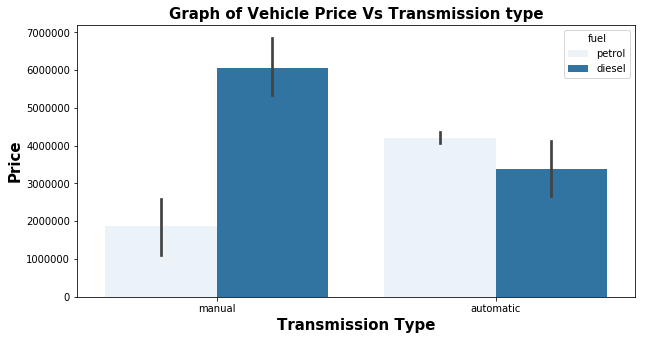

In [23]:
plt.figure(figsize=(10,5))
base = sb.color_palette()[0]
sb.barplot(data=car_data, x='transmission', y='price',color=base,hue='fuel')
plt.xlabel('Transmission Type',fontsize=15,weight='bold')
plt.ylabel('Price',fontsize=15,weight='bold')
plt.title('Graph of Vehicle Price Vs Transmission type',fontsize=15,weight='bold'); 

## Vehicles Price vs. Vehicle Fuel Type And Odometer Reading

Most of the vehicles in Nigeria using petrol as a fuel type, and the price of vehicle that  used diesel as a fuel type tend to have poor correlation with odometer reading. That is means odometer reading does not have strong effect on the price of vehicle that used diesel as a fuel type.

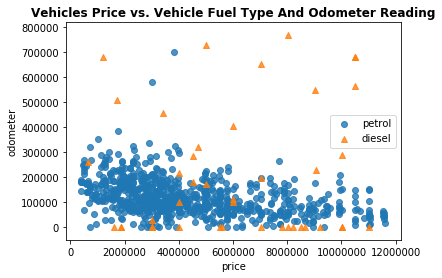

In [24]:
# use a samle of 1000 data from fuel_econ dataset
np.random.seed(2018)
sample = np.random.choice(car_data.shape[0],1000,replace=False)
car_data_subset = car_data.loc[sample].reset_index()
# plot
markers = [['petrol', 'o'],
              ['diesel','^']]
for i, marker in markers:
    plot_data = car_data_subset[car_data_subset['fuel']==i]
    sb.regplot(data=plot_data, x='price', y = 'odometer', x_jitter=0.05, fit_reg=False,marker=marker)
plt.legend(['petrol', 'diesel'])
plt.ticklabel_format(style='plain', axis='x');
plt.title('Vehicles Price vs. Vehicle Fuel Type And Odometer Reading',weight='bold');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 478102 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
